In [36]:
import pandas as pd
train=pd.read_csv("data/train_v3.csv")
test=pd.read_csv("data/test_v3.csv")

<AxesSubplot:>

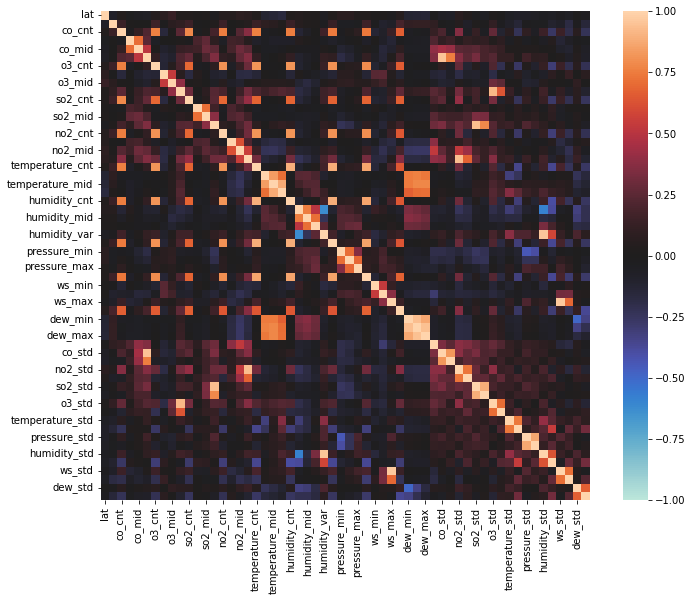

In [44]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import seaborn as sns

def make_corr_array(df, cols):
    output = pd.DataFrame(1 - squareform(pdist(df[cols].T, 'correlation')),
                          columns=cols, index=cols)
    return output

import re
corr_df = make_corr_array(train, [c for c in train.columns if re.search(r'mid|min|max|cnt|lat|lon|se|std|rng', c)])
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(corr_df, square=True, vmax=1, vmin=-1, center=0)

In [45]:
import numpy as np
corr_top10 = corr_df.loc[:, ['pm25_mid']].assign(abs_value=lambda d: np.abs(d['pm25_mid']))\
                    .sort_values('abs_value', ascending=False)\
                    .iloc[1:11, :].index.tolist()
corr_top10

['no2_mid',
 'co_mid',
 'no2_max',
 'no2_min',
 'no2_std',
 'co_max',
 'no2_se',
 'co_std',
 'so2_max',
 'ws_mid']

In [11]:
df=pd.read_feather("data/features/GroupFeatures_dbf86d0aded735e78c2bebce11dc2923/train.ftr")
df

,agg_mean_no2_mid_grpby_City,agg_mean_co_mid_grpby_City,agg_mean_no2_max_grpby_City,agg_mean_no2_min_grpby_City,agg_mean_co_max_grpby_City,agg_mean_so2_max_grpby_City,agg_mean_ws_mid_grpby_City,agg_mean_so2_mid_grpby_City,agg_mean_o3_max_grpby_City,agg_mean_co_min_grpby_City,...,agg_sum_no2_mid_grpby_City_diff,agg_sum_co_mid_grpby_City_diff,agg_sum_no2_max_grpby_City_diff,agg_sum_no2_min_grpby_City_diff,agg_sum_co_max_grpby_City_diff,agg_sum_so2_max_grpby_City_diff,agg_sum_ws_mid_grpby_City_diff,agg_sum_so2_mid_grpby_City_diff,agg_sum_o3_max_grpby_City_diff,agg_sum_co_min_grpby_City_diff
0,4.639120,2.055438,14.029638,1.126139,4.494467,5.415919,1.918031,1.372867,21.092339,0.922477,...,-4680.343,-2071.347,-14153.717,-1136.274,-4532.284,-5463.762,-1934.205,-1384.755,-21276.254,-930.030
1,3.474732,3.267956,11.171936,1.033027,7.634273,4.250792,2.780949,1.201053,24.128315,1.756618,...,-3672.491,-3451.049,-11803.325,-1091.811,-8064.599,-4476.935,-2935.990,-1269.411,-25491.297,-1854.151
2,7.084088,2.446379,20.084903,2.293358,5.565543,5.646159,3.038696,1.751329,30.026546,1.187663,...,-7350.532,-2538.144,-20835.899,-2379.534,-5774.834,-5813.061,-3152.059,-1816.415,-31144.123,-1231.604
3,7.854227,3.134177,22.533547,2.372166,6.624604,9.945406,2.576174,2.484816,36.260509,1.555371,...,-5614.010,-2236.161,-16132.332,-1685.884,-4735.039,-7116.800,-1846.614,-1778.383,-25960.411,-1110.615
4,6.201595,2.819731,18.921414,1.910228,5.866830,5.879041,2.972084,2.636753,33.554412,1.265959,...,-5957.198,-2709.540,-18207.659,-1826.549,-5644.524,-5657.424,-2864.334,-2536.036,-32307.853,-1215.695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195936,7.008573,3.391520,20.349917,1.998037,7.464929,7.247964,2.218273,2.232479,35.012777,1.726067,...,-5458.607,-2640.999,-15851.437,-1556.471,-5813.879,-5644.653,-1725.325,-1738.013,-27249.067,-1343.912
195937,7.271264,1.796252,21.078155,1.925045,4.168300,4.355327,2.634168,1.482792,30.310299,0.827861,...,-6928.339,-1710.572,-20080.515,-1833.894,-3969.164,-4149.335,-2507.388,-1412.430,-28862.605,-788.424
195938,8.257751,2.854228,23.186824,2.551602,5.827253,4.939036,2.669381,1.600990,36.983797,1.580213,...,-8583.217,-2961.770,-24079.807,-2650.998,-6053.704,-5130.093,-2775.069,-1662.115,-38425.599,-1641.447
195939,9.595272,2.833831,26.448199,3.247206,12.065115,10.230449,2.494911,4.427981,32.619101,0.973011,...,-9032.005,-2666.765,-24887.529,-3056.882,-11356.571,-9632.890,-2347.148,-4168.620,-30689.362,-913.963


In [8]:
col = "Country"
train_values=set(train[col])
test_values = set(test[col])


len(train_values),len(test_values),len(train_values & test_values)


(30, 30, 30)

In [30]:
train

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid,yyyymmdd
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,...,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901,20190101
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,...,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741,20190101
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,...,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918,20190101
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,...,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370,20190101
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,...,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063,20190101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195936,195937,2021,12,31,United States,Jacksonville,30.33218,-81.65565,12,0.694,...,2.710,6.125,3.757,12,16.774,22.679,26.058,13.252,16.150,20211231
195937,195938,2021,12,31,United States,Las Vegas,36.17497,-115.13722,14,0.528,...,2.974,6.861,8.354,12,10.432,14.741,15.827,7.078,16.895,20211231
195938,195939,2021,12,31,United States,Milwaukee,43.03890,-87.90647,171,1.975,...,1.087,2.578,0.612,26,2.049,3.531,6.686,5.286,86.299,20211231
195939,195940,2021,12,31,Vietnam,Hanoi,21.02450,105.84117,31,2.613,...,3.058,6.005,6.085,51,1.922,7.443,7.716,4.642,36.523,20211231


In [29]:
train=train.sort_values("yyyymmdd")

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid,yyyymmdd
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,...,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901,20190101
120,121,2019,1,1,Poland,Wrocław,51.10000,17.03333,144,4.608,...,0.493,1.070,0.134,38,1.755,3.505,8.292,10.039,163.352,20190101
121,122,2019,1,1,Poland,Łódź,51.77058,19.47395,65,2.414,...,9.528,13.417,31.613,17,0.506,3.049,4.925,4.751,51.855,20190101
122,123,2019,1,1,Russia,Nizhniy Novgorod,56.32867,44.00205,109,4.704,...,1.499,4.078,3.114,80,6.861,10.745,12.259,6.741,60.539,20190101
123,124,2019,1,1,Serbia,Niš,43.32472,21.90333,31,8.636,...,0.995,1.383,0.226,63,-0.011,7.387,7.866,6.391,151.734,20190101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195830,195831,2021,12,31,India,Bhopal,23.25469,77.40289,43,3.427,...,1.324,2.772,1.148,36,7.128,9.097,9.909,1.882,95.166,20211231
195831,195832,2021,12,31,India,Chandigarh,30.73629,76.78840,95,0.105,...,1.180,1.914,0.891,24,4.584,6.569,8.123,3.048,166.908,20211231
195832,195833,2021,12,31,India,Chennai,13.08784,80.27847,67,5.682,...,2.211,6.961,9.184,86,24.607,26.329,26.641,1.001,93.330,20211231
195824,195825,2021,12,31,Hungary,Budapest,47.49835,19.04045,321,2.219,...,3.880,6.935,7.293,390,0.827,5.100,7.789,10.945,54.332,20211231


In [44]:

def hoge(row):
    return f"{row['year']}{row['month']:02}{row['day']:02}"

train=pd.read_csv("data/train.csv")
train["yyyymmdd"] = train.apply(hoge, axis=1)
train["yyyymmdd"]

key_col = "City"
input_cols = ["no2_max", "no2_min"]
lag = 1
tmp=train.sort_values("yyyymmdd")
features=tmp.groupby(key_col)[input_cols].diff(lag)
features=features.sort_index()
features

,no2_max,no2_min
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
195936,-9.809,-1.382
195937,-18.031,-0.768
195938,16.363,-6.539
195939,-12.204,-1.324


In [42]:
features.sort_index()

,no2_max,no2_min
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
195936,-9.809,-1.382
195937,-18.031,-0.768
195938,16.363,-6.539
195939,-12.204,-1.324


In [18]:
train

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,...,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,...,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,...,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,...,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,...,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195936,195937,2021,12,31,United States,Jacksonville,30.33218,-81.65565,12,0.694,...,2.195,2.710,6.125,3.757,12,16.774,22.679,26.058,13.252,16.150
195937,195938,2021,12,31,United States,Las Vegas,36.17497,-115.13722,14,0.528,...,1.002,2.974,6.861,8.354,12,10.432,14.741,15.827,7.078,16.895
195938,195939,2021,12,31,United States,Milwaukee,43.03890,-87.90647,171,1.975,...,0.994,1.087,2.578,0.612,26,2.049,3.531,6.686,5.286,86.299
195939,195940,2021,12,31,Vietnam,Hanoi,21.02450,105.84117,31,2.613,...,1.005,3.058,6.005,6.085,51,1.922,7.443,7.716,4.642,36.523
